## `Decision Tree` **Implementation**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [11]:
X = pd.DataFrame(iris["data"], columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
Y = iris["target"]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = 10)

In [14]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()
treeclassifier.fit(X_train, Y_train)

DecisionTreeClassifier()

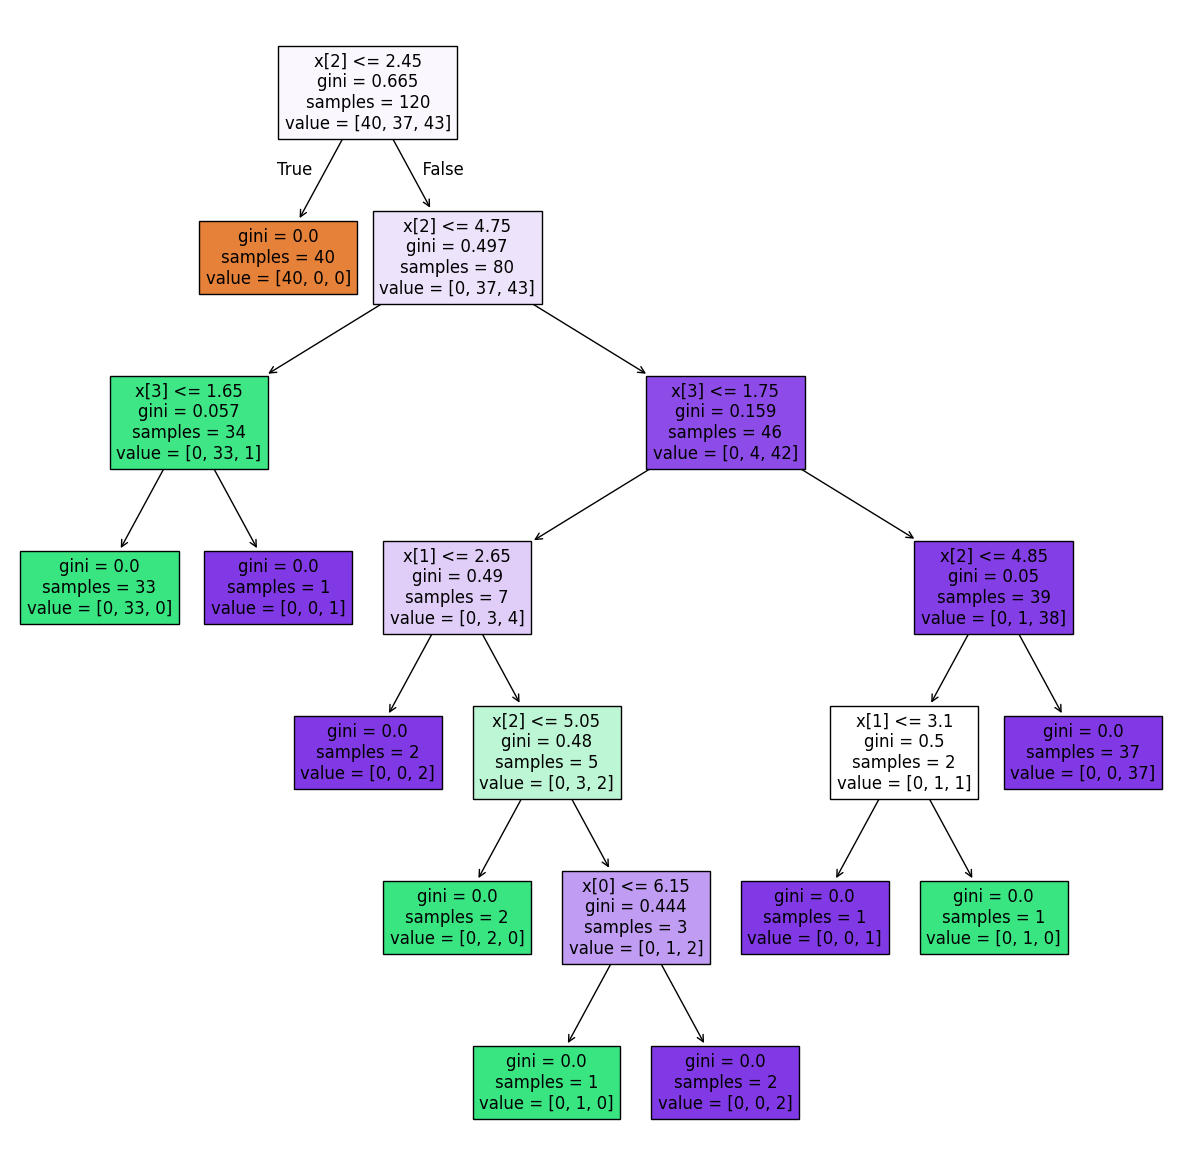

In [15]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(treeclassifier, filled = True); #Overfitting can occur since were splitting until we get al leaf nodes

In [16]:
Y_pred = treeclassifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## `Decision Tree CLassifier` and `Hyperparameter Tuning`

In [18]:
params = {
    "criterion":['gini', 'entropy', 'log_loss'], 
    "splitter":['best', 'random'],
    "max_depth":[1,2,3,4,5,6,7,8,9,10],
    "min_samples_split":[1,2,3,4,5,6,7,8,9,10],
    "max_features":["auto","sqrt", "log2"],  
}

In [19]:
from sklearn.model_selection import GridSearchCV
treeclassifier = DecisionTreeClassifier()

In [20]:
grid = GridSearchCV(estimator=treeclassifier, param_grid=params, n_jobs=-1, verbose=3, cv = 5, scoring = "accuracy")

In [21]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


c:\Udemy-Data-Science-Krish-Naik\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3600 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1223 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Udemy-Data-Science-Krish-Naik\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Udemy-Data-Science-Krish-Naik\venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Udemy-Data-Science-Krish-Naik\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constr

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [22]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_split': 10,
 'splitter': 'random'}

In [23]:
grid.best_score_

np.float64(0.9666666666666668)

In [25]:
Y_pred = grid.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

